# SCATTERPLOT LOGO

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## Import fonts

In [3]:
font_path_bold = "/Users/alfonsomarino/Desktop/Teko/static/Teko-SemiBold.ttf"
font_prop_bold = FontProperties(fname=font_path_bold)

font_path = '/Users/alfonsomarino/Desktop/Teko/static/Teko-Regular.ttf'
font_prop = FontProperties(fname=font_path)

## Import dataset excel

In [4]:
sosta = pd.read_excel("/Users/alfonsomarino/Desktop/sosta.xlsx")

In [5]:
sosta.head()

,team,Goals,Tiri totali,Tiri in porta,%Tiri in porta,Tiri/90,Tiri in porta/90,Gol per tiro,Gol per tiro in porta,Dist,...,Tocchi area di rigore,Palle al piede terzo offensivo,Palle al piede area di rigore,shotOboxTotal_shots,shotPenaltyArea_shots,shotSixYardBox_shots,shotOboxTotal_goals,shotPenaltyArea_goals,shotSixYardBox_goals,Tiri subiti
0,Atalanta,16,110,36,32.7,15.71,5.14,0.12,0.36,15.7,...,209,133,38,29,78,11,3,11,2,86
1,Bologna,7,96,26,27.1,13.71,3.71,0.06,0.23,17.3,...,154,72,32,31,62,5,2,4,1,78
2,Cagliari,5,105,21,20.0,15.00,3.00,0.04,0.19,16.2,...,149,77,24,33,61,13,1,2,2,105
3,Como,8,100,32,32.0,14.29,4.57,0.08,0.25,19.3,...,141,95,32,44,54,4,2,4,2,68
4,Empoli,6,59,17,28.8,8.43,2.43,0.08,0.29,16.4,...,84,46,22,16,38,7,0,3,3,111


## Import logo

In [6]:
loghi = {
    "Monza": '/Users/alfonsomarino/Desktop/LoghiITA/Monza.png',
    "Lazio": '/Users/alfonsomarino/Desktop/LoghiITA/Lazio.png',
    "Napoli": '/Users/alfonsomarino/Desktop/LoghiITA/Napoli.png',
    "Genoa": '/Users/alfonsomarino/Desktop/LoghiITA/Genoa.png',
    "Juventus": '/Users/alfonsomarino/Desktop/LoghiITA/Juventus.png',
    "Roma": '/Users/alfonsomarino/Desktop/LoghiITA/Roma.png',
    "Milan": '/Users/alfonsomarino/Desktop/LoghiITA/Milan.png',
    "Como": '/Users/alfonsomarino/Desktop/LoghiITA/Como.png',
    "Inter": '/Users/alfonsomarino/Desktop/LoghiITA/Inter.png',
    "Torino": '/Users/alfonsomarino/Desktop/LoghiITA/Torino.png',
    "Parma": '/Users/alfonsomarino/Desktop/LoghiITA/Parma.png',
    "Cagliari": '/Users/alfonsomarino/Desktop/LoghiITA/Cagliari.png',
    "Hellas Verona": '/Users/alfonsomarino/Desktop/LoghiITA/Verona.png',
    "Fiorentina": '/Users/alfonsomarino/Desktop/LoghiITA/Fiorentina.png',
    "Udinese": '/Users/alfonsomarino/Desktop/LoghiITA/Udinese.png',
    "Venezia": '/Users/alfonsomarino/Desktop/LoghiITA/Venezia.png',
    "Atalanta": '/Users/alfonsomarino/Desktop/LoghiITA/Atalanta.png',
    "Lecce": '/Users/alfonsomarino/Desktop/LoghiITA/Lecce.png',
    "Bologna": '/Users/alfonsomarino/Desktop/LoghiITA/Bologna.png',
    "Empoli": '/Users/alfonsomarino/Desktop/LoghiITA/Empoli.png'
}

In [7]:
#add new column with paths

sosta["Logo"] = sosta["team"].map(loghi)

## Visualization

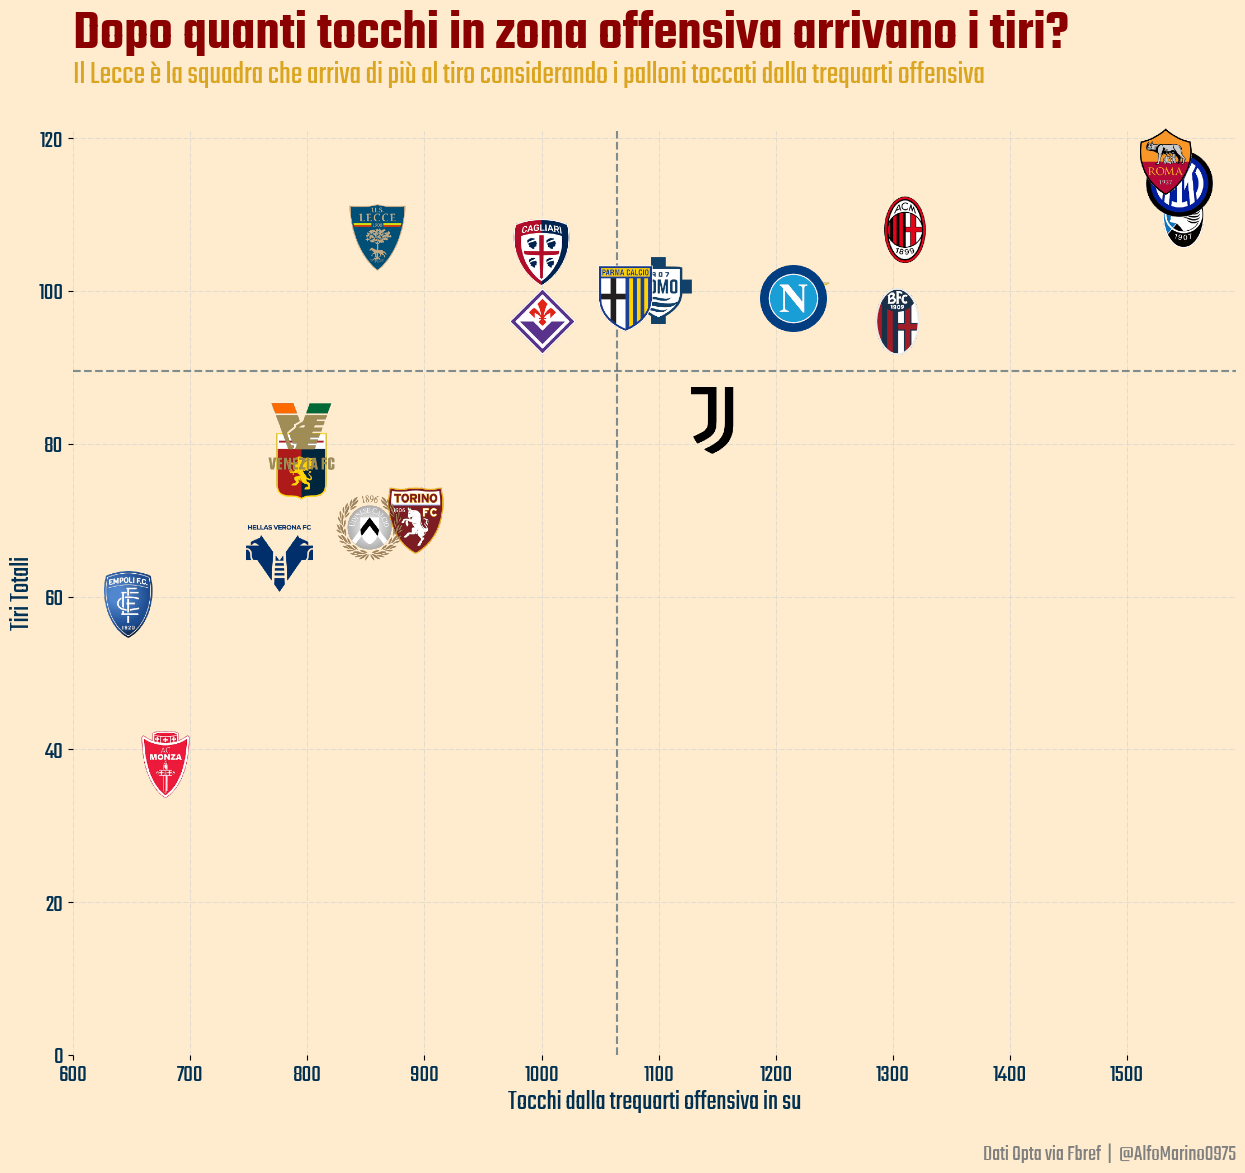

In [8]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=0.4, alpha = 1)

sosta["Tocchi dalla trequarti in su"] = sosta["Tocchi terzo offensivo"] + sosta["Tocchi area di rigore"]

fig, ax = plt.subplots(figsize=(15, 12), facecolor='blanchedalmond')
plt.gca().set_facecolor('blanchedalmond')

# Scatter plot
ax.scatter(sosta["Tocchi dalla trequarti in su"], sosta["Tiri totali"], color='blanchedalmond', s=100)

for index, row in sosta.iterrows():
    ab = AnnotationBbox(getImage(row["Logo"]), (row["Tocchi dalla trequarti in su"], row["Tiri totali"]), frameon=False)
    ax.add_artist(ab)

plt.title('Dopo quanti tocchi in zona offensiva arrivano i tiri?', fontproperties=font_prop_bold, fontsize=40, color="darkred", pad=60, loc='left')
fig.text(0.125,0.92, "Il Lecce è la squadra che arriva di più al tiro considerando i palloni toccati dalla trequarti offensiva",
        fontproperties=font_prop, fontsize=23, color = "goldenrod")

plt.xticks(range(600,1600,100),fontproperties=font_prop, fontsize=18, color = '#003153')
plt.yticks(range(0,140,20),fontproperties=font_prop, fontsize=18, color = '#003153')
ax.set_xlabel('Tocchi dalla trequarti offensiva in su', fontproperties=font_prop, fontsize=20, color = "#003153")
ax.set_ylabel('Tiri Totali', fontproperties=font_prop, fontsize=20, color = "#003153")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.grid(True, color="lightgrey", linestyle='dashdot', linewidth=0.5)

ax.axhline(y= sosta["Tiri totali"].mean(), color='#003153', linestyle='--', label='Media Tiri Totali', alpha = 0.5)
ax.axvline(x= sosta["Tocchi dalla trequarti in su"].mean(), color='#003153', linestyle='--', label='Media Tocchi', alpha = 0.5)

fig.text(0.90, 0.02, 'Dati Opta via Fbref  |  @AlfoMarino0975', fontproperties=font_prop, fontsize=16, color='gray', 
         ha='right', va='bottom')

#plt.savefig('/Users/alfonsomarino/Desktop/scatter_tiri.png', dpi=300, bbox_inches='tight')

# Mostra il grafico
#plt.tight_layout()
plt.show()